In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

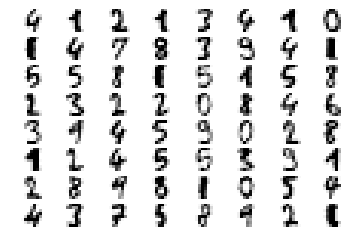

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 6)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.56686 stdev: 0.27088
Best fitness: 0.90724 - size: (2, 13) - species 1 - id 117
Average adjusted fitness: 0.489
Mean genetic distance 2.974, standard deviation 0.516
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 5.369 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.70302 stdev: 0.24808
Best fitness: 0.97403 - size: (2, 13) - species 23 - id 372
Average adjusted fitness: 0.636
Mean genetic distance 2.990, standard deviation 0.518
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.573 sec (5.471 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.77156 stdev: 0.21438
Best fitness: 0.97403 - size: (2, 13) - species 23 - id 372
Average adjusted fitness: 0.672
Mean genetic distance 2.941, standard deviation 0.515
Population of 197 members in 25 specie

number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.57173 stdev: 0.21155
Best fitness: 0.81509 - size: (2, 13) - species 5 - id 71
Average adjusted fitness: 0.325
Mean genetic distance 2.960, standard deviation 0.504
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 5.357 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63492 stdev: 0.20909
Best fitness: 0.88374 - size: (3, 15) - species 3 - id 377
Average adjusted fitness: 0.420
Mean genetic distance 3.033, standard deviation 0.512
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.682 sec (5.519 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68720 stdev: 0.17687
Best fitness: 0.88374 - size: (3, 15) - species 25 - id 377
Average adjusted fitness: 0.513
Mean genetic distance 3.020, standard deviation 0.510
Population of 203 members in 31 species
Total extinctions: 0
Generation tim

Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.421 sec (5.893 average)
running:8/511
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.57330 stdev: 0.22120
Best fitness: 0.92703 - size: (2, 13) - species 3 - id 8
Average adjusted fitness: 0.458
Mean genetic distance 2.911, standard deviation 0.517
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.287 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63765 stdev: 0.19928
Best fitness: 0.92703 - size: (2, 13) - species 3 - id 8
Average adjusted fitness: 0.439
Mean genetic distance 2.999, standard deviation 0.507
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 6.517 sec (5.902 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66922 stdev: 0.19613
Best fitness: 0.92703 - size: (2, 13) - species 23 - id 8
Average adjusted fitness: 0

Population of 204 members in 39 species
Total extinctions: 0
Generation time: 7.215 sec (6.269 average)
running:12/511
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.54317 stdev: 0.14418
Best fitness: 0.75077 - size: (2, 13) - species 2 - id 34
Average adjusted fitness: 0.319
Mean genetic distance 2.818, standard deviation 0.458
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 6.833 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63397 stdev: 0.12328
Best fitness: 0.78293 - size: (2, 13) - species 17 - id 347
Average adjusted fitness: 0.331
Mean genetic distance 2.905, standard deviation 0.505
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.033 sec (6.433 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63123 stdev: 0.11326
Best fitness: 0.78293 - size: (2, 13) - species 17 - id 347
Average adjusted fit

Mean genetic distance 3.168, standard deviation 0.477
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.613 sec (6.613 average)
running:16/511
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.58412 stdev: 0.19873
Best fitness: 0.84106 - size: (2, 13) - species 4 - id 21
Average adjusted fitness: 0.387
Mean genetic distance 2.900, standard deviation 0.467
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.274 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67928 stdev: 0.17538
Best fitness: 0.86024 - size: (3, 15) - species 1 - id 218
Average adjusted fitness: 0.477
Mean genetic distance 2.989, standard deviation 0.466
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.632 sec (5.453 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.74147 stdev: 0.13092
Best fitness: 0.86024 - siz

Generation time: 6.818 sec (6.189 average)
running:20/511
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.54075 stdev: 0.14995
Best fitness: 0.79530 - size: (2, 13) - species 3 - id 102
Average adjusted fitness: 0.298
Mean genetic distance 2.897, standard deviation 0.458
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.211 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62156 stdev: 0.13005
Best fitness: 0.79530 - size: (2, 13) - species 7 - id 102
Average adjusted fitness: 0.372
Mean genetic distance 2.931, standard deviation 0.451
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.578 sec (5.394 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63998 stdev: 0.12768
Best fitness: 0.80334 - size: (3, 15) - species 7 - id 545
Average adjusted fitness: 0.412
Mean genetic distance 2.991, standard deviation 0.


 ****** Running generation 0 ****** 

Population's average fitness: 0.53761 stdev: 0.15166
Best fitness: 0.80087 - size: (2, 13) - species 1 - id 28
Average adjusted fitness: 0.285
Mean genetic distance 2.941, standard deviation 0.456
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.173 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61034 stdev: 0.13997
Best fitness: 0.82375 - size: (3, 14) - species 2 - id 360
Average adjusted fitness: 0.362
Mean genetic distance 3.036, standard deviation 0.451
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.883 sec (7.028 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63625 stdev: 0.12891
Best fitness: 0.84787 - size: (3, 13) - species 19 - id 421
Average adjusted fitness: 0.466
Mean genetic distance 3.060, standard deviation 0.454
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.198 sec (7.085 av

number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.51581 stdev: 0.09367
Best fitness: 0.77056 - size: (2, 13) - species 5 - id 83
Average adjusted fitness: 0.275
Mean genetic distance 2.899, standard deviation 0.458
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.256 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57044 stdev: 0.08947
Best fitness: 0.78108 - size: (3, 15) - species 4 - id 330
Average adjusted fitness: 0.304
Mean genetic distance 2.962, standard deviation 0.465
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.620 sec (5.438 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59111 stdev: 0.09442
Best fitness: 0.78108 - size: (3, 15) - species 3 - id 330
Average adjusted fitness: 0.278
Mean genetic distance 2.967, standard deviation 0.474
Population of 202 members in 33 species
Total extinction

number of class1:323
number of class2:1294

 ****** Running generation 0 ****** 

Population's average fitness: 0.57159 stdev: 0.21792
Best fitness: 0.83921 - size: (2, 13) - species 5 - id 25
Average adjusted fitness: 0.425
Mean genetic distance 2.942, standard deviation 0.485
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.307 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67248 stdev: 0.18965
Best fitness: 0.85034 - size: (2, 14) - species 5 - id 360
Average adjusted fitness: 0.526
Mean genetic distance 2.987, standard deviation 0.492
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.675 sec (5.491 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70542 stdev: 0.17412
Best fitness: 0.87508 - size: (4, 15) - species 6 - id 525
Average adjusted fitness: 0.505
Mean genetic distance 2.998, standard deviation 0.509
Population of 200 members in 34 species
Total extinctio

Population's average fitness: 0.53810 stdev: 0.15937
Best fitness: 0.79221 - size: (2, 13) - species 1 - id 85
Average adjusted fitness: 0.364
Mean genetic distance 2.816, standard deviation 0.432
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 7.537 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62623 stdev: 0.13466
Best fitness: 0.83612 - size: (2, 14) - species 14 - id 301
Average adjusted fitness: 0.393
Mean genetic distance 2.948, standard deviation 0.460
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 7.143 sec (7.340 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64059 stdev: 0.13908
Best fitness: 0.83797 - size: (3, 15) - species 25 - id 446
Average adjusted fitness: 0.405
Mean genetic distance 2.993, standard deviation 0.458
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.300 sec (6.993 average)

 ****** Running generation 3 *

running:40/511
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.53486 stdev: 0.15912
Best fitness: 0.85714 - size: (2, 13) - species 5 - id 89
Average adjusted fitness: 0.384
Mean genetic distance 2.755, standard deviation 0.470
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 5.420 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63122 stdev: 0.13514
Best fitness: 0.85714 - size: (2, 13) - species 2 - id 89
Average adjusted fitness: 0.421
Mean genetic distance 2.884, standard deviation 0.481
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.572 sec (5.496 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64493 stdev: 0.14153
Best fitness: 0.85714 - size: (2, 13) - species 16 - id 89
Average adjusted fitness: 0.411
Mean genetic distance 2.939, standard deviation 0.497
Population of 199 members in 26 species
T

number of class2:971

 ****** Running generation 0 ****** 

Population's average fitness: 0.51483 stdev: 0.10599
Best fitness: 0.77056 - size: (2, 13) - species 1 - id 81
Average adjusted fitness: 0.299
Mean genetic distance 2.943, standard deviation 0.496
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.662 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56887 stdev: 0.10054
Best fitness: 0.82993 - size: (3, 15) - species 4 - id 345
Average adjusted fitness: 0.320
Mean genetic distance 2.982, standard deviation 0.462
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 6.003 sec (6.833 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60021 stdev: 0.09430
Best fitness: 0.82993 - size: (3, 15) - species 1 - id 345
Average adjusted fitness: 0.337
Mean genetic distance 2.970, standard deviation 0.438
Population of 199 members in 32 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.54897 stdev: 0.15000
Best fitness: 0.77551 - size: (2, 13) - species 1 - id 169
Average adjusted fitness: 0.365
Mean genetic distance 2.856, standard deviation 0.458
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.372 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63142 stdev: 0.13006
Best fitness: 0.81262 - size: (2, 14) - species 7 - id 302
Average adjusted fitness: 0.367
Mean genetic distance 2.954, standard deviation 0.471
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 5.605 sec (5.989 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63777 stdev: 0.13955
Best fitness: 0.84477 - size: (3, 16) - species 12 - id 526
Average adjusted fitness: 0.367
Mean genetic distance 2.928, standard deviation 0.477
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 6.055 sec (6.011 average)

 ****** Running generation 3 *

Population's average fitness: 0.52628 stdev: 0.10463
Best fitness: 0.76067 - size: (2, 13) - species 2 - id 48
Average adjusted fitness: 0.288
Mean genetic distance 2.925, standard deviation 0.503
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.242 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57676 stdev: 0.09849
Best fitness: 0.82498 - size: (3, 14) - species 5 - id 289
Average adjusted fitness: 0.302
Mean genetic distance 3.051, standard deviation 0.498
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.327 sec (5.785 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58497 stdev: 0.10263
Best fitness: 0.82498 - size: (3, 14) - species 26 - id 289
Average adjusted fitness: 0.326
Mean genetic distance 3.063, standard deviation 0.490
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.907 sec (6.492 average)

 ****** Running generation 3 **

Population's average fitness: 0.51917 stdev: 0.10805
Best fitness: 0.82560 - size: (2, 13) - species 6 - id 77
Average adjusted fitness: 0.293
Mean genetic distance 2.842, standard deviation 0.460
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.495 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56257 stdev: 0.10278
Best fitness: 0.82684 - size: (2, 13) - species 6 - id 366
Average adjusted fitness: 0.264
Mean genetic distance 2.914, standard deviation 0.455
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.071 sec (5.783 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58811 stdev: 0.10514
Best fitness: 0.82684 - size: (2, 13) - species 7 - id 366
Average adjusted fitness: 0.300
Mean genetic distance 2.961, standard deviation 0.468
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.052 sec (5.873 average)

 ****** Running generation 3 ***

Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.564 sec (5.973 average)
running:60/511
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.50110 stdev: 0.07682
Best fitness: 0.73222 - size: (2, 13) - species 7 - id 103
Average adjusted fitness: 0.280
Mean genetic distance 2.837, standard deviation 0.453
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 5.179 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54557 stdev: 0.08516
Best fitness: 0.80767 - size: (2, 14) - species 1 - id 201
Average adjusted fitness: 0.198
Mean genetic distance 2.892, standard deviation 0.489
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 5.544 sec (5.362 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57427 stdev: 0.09162
Best fitness: 0.81942 - size: (3, 16) - species 13 - id 521
Average adjusted fitn

Mean genetic distance 3.179, standard deviation 0.459
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.010 sec (6.339 average)
running:64/511
number of class1:327
number of class2:1290

 ****** Running generation 0 ****** 

Population's average fitness: 0.56394 stdev: 0.21089
Best fitness: 0.83735 - size: (2, 13) - species 2 - id 133
Average adjusted fitness: 0.414
Mean genetic distance 2.875, standard deviation 0.496
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.062 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65623 stdev: 0.18042
Best fitness: 0.83735 - size: (2, 13) - species 2 - id 133
Average adjusted fitness: 0.458
Mean genetic distance 2.919, standard deviation 0.489
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 8.815 sec (7.939 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72404 stdev: 0.14411
Best fitness: 0.83735 - si

Generation time: 6.337 sec (5.977 average)
running:68/511
number of class1:487
number of class2:1130

 ****** Running generation 0 ****** 

Population's average fitness: 0.54132 stdev: 0.14231
Best fitness: 0.78046 - size: (2, 13) - species 1 - id 183
Average adjusted fitness: 0.313
Mean genetic distance 2.867, standard deviation 0.491
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.341 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62301 stdev: 0.12239
Best fitness: 0.79716 - size: (3, 15) - species 2 - id 326
Average adjusted fitness: 0.391
Mean genetic distance 2.960, standard deviation 0.512
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 5.558 sec (5.449 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64934 stdev: 0.11300
Best fitness: 0.79716 - size: (3, 15) - species 18 - id 326
Average adjusted fitness: 0.364
Mean genetic distance 3.039, standard deviation 0

Total extinctions: 0
Generation time: 7.413 sec (6.533 average)
running:72/511
number of class1:490
number of class2:1127

 ****** Running generation 0 ****** 

Population's average fitness: 0.53925 stdev: 0.14410
Best fitness: 0.78355 - size: (2, 13) - species 1 - id 47
Average adjusted fitness: 0.317
Mean genetic distance 2.923, standard deviation 0.462
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.770 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60422 stdev: 0.13236
Best fitness: 0.79406 - size: (3, 15) - species 14 - id 262
Average adjusted fitness: 0.307
Mean genetic distance 2.988, standard deviation 0.463
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 7.433 sec (7.101 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63826 stdev: 0.12496
Best fitness: 0.79468 - size: (4, 16) - species 14 - id 538
Average adjusted fitness: 0.365
Mean genetic distance 3.002,

Total extinctions: 0
Generation time: 8.319 sec (6.908 average)
running:76/511
number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.51302 stdev: 0.08925
Best fitness: 0.69882 - size: (2, 13) - species 4 - id 140
Average adjusted fitness: 0.208
Mean genetic distance 2.904, standard deviation 0.517
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.427 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56613 stdev: 0.07351
Best fitness: 0.70439 - size: (3, 15) - species 12 - id 273
Average adjusted fitness: 0.211
Mean genetic distance 3.010, standard deviation 0.531
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 7.077 sec (6.252 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57899 stdev: 0.07398
Best fitness: 0.72665 - size: (4, 17) - species 4 - id 525
Average adjusted fitness: 0.212
Mean genetic distance 3.017, 

Mean genetic distance 3.153, standard deviation 0.472
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 6.757 sec (7.270 average)
running:80/511
number of class1:491
number of class2:1126

 ****** Running generation 0 ****** 

Population's average fitness: 0.53991 stdev: 0.14283
Best fitness: 0.77427 - size: (2, 13) - species 1 - id 30
Average adjusted fitness: 0.280
Mean genetic distance 2.912, standard deviation 0.500
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 5.498 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60905 stdev: 0.13254
Best fitness: 0.80272 - size: (3, 15) - species 6 - id 350
Average adjusted fitness: 0.307
Mean genetic distance 3.057, standard deviation 0.497
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.874 sec (5.686 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64293 stdev: 0.12173
Best fitness: 0.80272 - siz

Population's average fitness: 0.60054 stdev: 0.09680
Best fitness: 0.80829 - size: (5, 20) - species 14 - id 973
Average adjusted fitness: 0.289
Mean genetic distance 3.130, standard deviation 0.510
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.446 sec (7.175 average)
running:84/511
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.51477 stdev: 0.09310
Best fitness: 0.68955 - size: (2, 13) - species 3 - id 28
Average adjusted fitness: 0.207
Mean genetic distance 2.912, standard deviation 0.499
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.954 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55579 stdev: 0.08932
Best fitness: 0.73036 - size: (3, 14) - species 6 - id 216
Average adjusted fitness: 0.207
Mean genetic distance 3.035, standard deviation 0.501
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5

Total extinctions: 0
Generation time: 6.376 sec (6.723 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60623 stdev: 0.10904
Best fitness: 0.82189 - size: (4, 17) - species 9 - id 578
Average adjusted fitness: 0.276
Mean genetic distance 3.072, standard deviation 0.473
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.970 sec (7.097 average)
running:88/511
number of class1:654
number of class2:963

 ****** Running generation 0 ****** 

Population's average fitness: 0.52674 stdev: 0.09052
Best fitness: 0.71058 - size: (2, 13) - species 1 - id 123
Average adjusted fitness: 0.257
Mean genetic distance 2.945, standard deviation 0.478
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.987 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56270 stdev: 0.08877
Best fitness: 0.75077 - size: (3, 15) - species 2 - id 311
Average adjusted fitness: 0.262
Mean genetic distance 3.017, s

Mean genetic distance 3.109, standard deviation 0.495
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 9.511 sec (7.541 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58790 stdev: 0.11082
Best fitness: 0.79035 - size: (3, 15) - species 6 - id 541
Average adjusted fitness: 0.254
Mean genetic distance 3.135, standard deviation 0.500
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 10.317 sec (8.004 average)
running:92/511
number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.49421 stdev: 0.05491
Best fitness: 0.65863 - size: (2, 13) - species 1 - id 198
Average adjusted fitness: 0.150
Mean genetic distance 2.909, standard deviation 0.470
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.667 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53414 stdev: 0.05400
Best fitness: 0.69450 - si

Population's average fitness: 0.63331 stdev: 0.12429
Best fitness: 0.78602 - size: (2, 13) - species 2 - id 78
Average adjusted fitness: 0.336
Mean genetic distance 3.129, standard deviation 0.503
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 10.028 sec (7.527 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64595 stdev: 0.12143
Best fitness: 0.78602 - size: (2, 13) - species 2 - id 78
Average adjusted fitness: 0.386
Mean genetic distance 3.146, standard deviation 0.498
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 9.120 sec (7.793 average)
running:96/511
number of class1:488
number of class2:1129

 ****** Running generation 0 ****** 

Population's average fitness: 0.53436 stdev: 0.13998
Best fitness: 0.73717 - size: (2, 13) - species 7 - id 66
Average adjusted fitness: 0.317
Mean genetic distance 2.945, standard deviation 0.516
Population of 200 members in 21 species
Total extinctions: 0
Gen

Population's average fitness: 0.56343 stdev: 0.07094
Best fitness: 0.72665 - size: (2, 14) - species 1 - id 543
Average adjusted fitness: 0.185
Mean genetic distance 3.071, standard deviation 0.482
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.450 sec (6.027 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57640 stdev: 0.06553
Best fitness: 0.72913 - size: (3, 15) - species 32 - id 951
Average adjusted fitness: 0.124
Mean genetic distance 3.104, standard deviation 0.483
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 6.417 sec (6.092 average)
running:100/511
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.51464 stdev: 0.09133
Best fitness: 0.72913 - size: (2, 13) - species 1 - id 98
Average adjusted fitness: 0.239
Mean genetic distance 2.933, standard deviation 0.512
Population of 199 members in 18 species
Total extinctions: 0
G

Total extinctions: 0
Generation time: 6.115 sec (5.893 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58366 stdev: 0.10943
Best fitness: 0.79654 - size: (3, 14) - species 14 - id 528
Average adjusted fitness: 0.277
Mean genetic distance 3.026, standard deviation 0.492
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 6.344 sec (5.983 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58563 stdev: 0.11386
Best fitness: 0.84045 - size: (3, 16) - species 14 - id 992
Average adjusted fitness: 0.281
Mean genetic distance 3.064, standard deviation 0.507
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.585 sec (6.084 average)
running:104/511
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.53067 stdev: 0.09917
Best fitness: 0.78479 - size: (2, 13) - species 3 - id 158
Average adjusted fitness: 0.256
Mean geneti

Mean genetic distance 3.149, standard deviation 0.505
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.878 sec (8.788 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58334 stdev: 0.09710
Best fitness: 0.76809 - size: (2, 12) - species 4 - id 675
Average adjusted fitness: 0.228
Mean genetic distance 3.123, standard deviation 0.512
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 8.631 sec (8.757 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57811 stdev: 0.10936
Best fitness: 0.76809 - size: (2, 12) - species 4 - id 675
Average adjusted fitness: 0.277
Mean genetic distance 3.114, standard deviation 0.508
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 8.081 sec (8.644 average)
running:108/511
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50450 stdev: 0.06696
Best fitne

Population's average fitness: 0.61763 stdev: 0.13266
Best fitness: 0.79839 - size: (3, 14) - species 14 - id 457
Average adjusted fitness: 0.357
Mean genetic distance 3.119, standard deviation 0.472
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 7.677 sec (7.430 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63691 stdev: 0.12257
Best fitness: 0.79839 - size: (3, 14) - species 14 - id 457
Average adjusted fitness: 0.355
Mean genetic distance 3.136, standard deviation 0.471
Population of 212 members in 43 species
Total extinctions: 0
Generation time: 6.792 sec (7.302 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62867 stdev: 0.13079
Best fitness: 0.79839 - size: (3, 14) - species 14 - id 457
Average adjusted fitness: 0.310
Mean genetic distance 3.160, standard deviation 0.466
Population of 214 members in 45 species
Total extinctions: 0
Generation time: 6.816 sec (7.221 average)
running:112/5

Population's average fitness: 0.56586 stdev: 0.10209
Best fitness: 0.76067 - size: (4, 16) - species 28 - id 641
Average adjusted fitness: 0.305
Mean genetic distance 3.051, standard deviation 0.486
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 6.050 sec (5.833 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58578 stdev: 0.09984
Best fitness: 0.76067 - size: (4, 16) - species 27 - id 641
Average adjusted fitness: 0.226
Mean genetic distance 3.050, standard deviation 0.481
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 6.446 sec (5.955 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59973 stdev: 0.09705
Best fitness: 0.78293 - size: (4, 18) - species 2 - id 949
Average adjusted fitness: 0.307
Mean genetic distance 3.053, standard deviation 0.488
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 6.645 sec (6.070 average)
running:116/51


Population's average fitness: 0.62160 stdev: 0.13780
Best fitness: 0.83797 - size: (3, 12) - species 27 - id 528
Average adjusted fitness: 0.321
Mean genetic distance 3.067, standard deviation 0.501
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.285 sec (5.917 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61768 stdev: 0.15027
Best fitness: 0.83797 - size: (3, 12) - species 27 - id 528
Average adjusted fitness: 0.332
Mean genetic distance 3.131, standard deviation 0.500
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.306 sec (5.995 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61967 stdev: 0.15376
Best fitness: 0.83797 - size: (3, 12) - species 27 - id 528
Average adjusted fitness: 0.356
Mean genetic distance 3.145, standard deviation 0.489
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 6.543 sec (6.086 average)
running:120/

Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.095 sec (6.615 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60705 stdev: 0.14516
Best fitness: 0.82808 - size: (5, 18) - species 6 - id 629
Average adjusted fitness: 0.305
Mean genetic distance 3.062, standard deviation 0.502
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 7.193 sec (6.760 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59748 stdev: 0.15609
Best fitness: 0.82808 - size: (5, 18) - species 6 - id 629
Average adjusted fitness: 0.346
Mean genetic distance 3.046, standard deviation 0.515
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 7.021 sec (6.812 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62219 stdev: 0.15023
Best fitness: 0.82808 - size: (5, 18) - species 6 - id 629
Average adjusted fitness: 0.355
Mean genetic distance 3.067, st


Population's average fitness: 0.68895 stdev: 0.17128
Best fitness: 0.86209 - size: (3, 15) - species 10 - id 540
Average adjusted fitness: 0.494
Mean genetic distance 3.013, standard deviation 0.498
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 6.149 sec (5.800 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67764 stdev: 0.18985
Best fitness: 0.86209 - size: (3, 15) - species 10 - id 540
Average adjusted fitness: 0.470
Mean genetic distance 3.051, standard deviation 0.501
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 6.373 sec (5.915 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68967 stdev: 0.17618
Best fitness: 0.86209 - size: (3, 15) - species 10 - id 540
Average adjusted fitness: 0.488
Mean genetic distance 3.068, standard deviation 0.506
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 6.480 sec (6.009 average)
running:128/

Population's average fitness: 0.58616 stdev: 0.08175
Best fitness: 0.72789 - size: (4, 17) - species 13 - id 658
Average adjusted fitness: 0.223
Mean genetic distance 3.014, standard deviation 0.451
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 8.075 sec (6.477 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59412 stdev: 0.07498
Best fitness: 0.73160 - size: (5, 19) - species 15 - id 809
Average adjusted fitness: 0.229
Mean genetic distance 3.040, standard deviation 0.455
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 7.193 sec (6.620 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60218 stdev: 0.08113
Best fitness: 0.77365 - size: (5, 18) - species 36 - id 930
Average adjusted fitness: 0.216
Mean genetic distance 3.048, standard deviation 0.463
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.863 sec (6.827 average)
running:132/5


 ****** Running generation 3 ****** 

Population's average fitness: 0.55483 stdev: 0.06965
Best fitness: 0.70563 - size: (4, 17) - species 14 - id 679
Average adjusted fitness: 0.291
Mean genetic distance 3.115, standard deviation 0.472
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.373 sec (5.801 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56587 stdev: 0.07239
Best fitness: 0.72542 - size: (3, 15) - species 28 - id 811
Average adjusted fitness: 0.198
Mean genetic distance 3.164, standard deviation 0.473
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.389 sec (5.919 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56852 stdev: 0.07146
Best fitness: 0.72604 - size: (6, 18) - species 30 - id 956
Average adjusted fitness: 0.228
Mean genetic distance 3.229, standard deviation 0.468
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 

Population of 204 members in 37 species
Total extinctions: 0
Generation time: 6.102 sec (5.802 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55207 stdev: 0.08100
Best fitness: 0.77922 - size: (3, 15) - species 17 - id 483
Average adjusted fitness: 0.227
Mean genetic distance 3.079, standard deviation 0.440
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 6.434 sec (5.960 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55959 stdev: 0.08124
Best fitness: 0.77922 - size: (3, 15) - species 37 - id 483
Average adjusted fitness: 0.219
Mean genetic distance 3.108, standard deviation 0.450
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 6.599 sec (6.088 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56841 stdev: 0.07960
Best fitness: 0.77922 - size: (3, 15) - species 37 - id 483
Average adjusted fitness: 0.167
Mean genetic distance 3.106,


 ****** Running generation 3 ****** 

Population's average fitness: 0.55729 stdev: 0.08860
Best fitness: 0.71058 - size: (3, 14) - species 14 - id 636
Average adjusted fitness: 0.207
Mean genetic distance 2.914, standard deviation 0.491
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.412 sec (6.106 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56911 stdev: 0.08031
Best fitness: 0.71058 - size: (3, 14) - species 14 - id 636
Average adjusted fitness: 0.192
Mean genetic distance 2.916, standard deviation 0.494
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.785 sec (6.442 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57322 stdev: 0.08098
Best fitness: 0.71119 - size: (4, 16) - species 14 - id 983
Average adjusted fitness: 0.198
Mean genetic distance 2.881, standard deviation 0.488
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 

Mean genetic distance 3.015, standard deviation 0.481
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 8.608 sec (8.397 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56655 stdev: 0.07044
Best fitness: 0.74335 - size: (4, 17) - species 13 - id 527
Average adjusted fitness: 0.130
Mean genetic distance 3.059, standard deviation 0.484
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 9.028 sec (8.555 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57913 stdev: 0.07641
Best fitness: 0.74335 - size: (4, 17) - species 35 - id 527
Average adjusted fitness: 0.258
Mean genetic distance 3.088, standard deviation 0.484
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 9.136 sec (8.671 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57868 stdev: 0.07574
Best fitness: 0.75572 - size: (4, 17) - species 18 - id 914
Averag

Population's average fitness: 0.55734 stdev: 0.09816
Best fitness: 0.78108 - size: (3, 14) - species 26 - id 333
Average adjusted fitness: 0.291
Mean genetic distance 3.110, standard deviation 0.493
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 8.709 sec (8.272 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57222 stdev: 0.09737
Best fitness: 0.78231 - size: (3, 14) - species 38 - id 658
Average adjusted fitness: 0.245
Mean genetic distance 3.143, standard deviation 0.483
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 10.835 sec (8.912 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57867 stdev: 0.09576
Best fitness: 0.78231 - size: (3, 14) - species 3 - id 658
Average adjusted fitness: 0.249
Mean genetic distance 3.170, standard deviation 0.492
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 11.835 sec (9.497 average)

 ****** Run

Mean genetic distance 3.043, standard deviation 0.500
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 13.174 sec (13.524 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56343 stdev: 0.09276
Best fitness: 0.73531 - size: (2, 13) - species 19 - id 50
Average adjusted fitness: 0.259
Mean genetic distance 3.027, standard deviation 0.508
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 15.699 sec (14.249 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56010 stdev: 0.10287
Best fitness: 0.75696 - size: (4, 17) - species 22 - id 657
Average adjusted fitness: 0.255
Mean genetic distance 3.075, standard deviation 0.511
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 15.836 sec (14.646 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58482 stdev: 0.10233
Best fitness: 0.76438 - size: (4, 17) - species 22 - id 815
A

Population's average fitness: 0.54814 stdev: 0.15182
Best fitness: 0.75201 - size: (2, 13) - species 2 - id 99
Average adjusted fitness: 0.288
Mean genetic distance 3.041, standard deviation 0.488
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 20.554 sec (19.892 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61080 stdev: 0.13123
Best fitness: 0.75201 - size: (2, 13) - species 2 - id 99
Average adjusted fitness: 0.328
Mean genetic distance 3.109, standard deviation 0.486
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 20.628 sec (20.137 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62907 stdev: 0.12417
Best fitness: 0.75572 - size: (3, 16) - species 21 - id 680
Average adjusted fitness: 0.340
Mean genetic distance 3.091, standard deviation 0.486
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 20.289 sec (20.175 average)

 ****** Ru

Mean genetic distance 3.047, standard deviation 0.523
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.084 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52844 stdev: 0.05437
Best fitness: 0.70192 - size: (2, 14) - species 7 - id 375
Average adjusted fitness: 0.134
Mean genetic distance 3.063, standard deviation 0.505
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 20.893 sec (19.989 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54374 stdev: 0.06139
Best fitness: 0.70192 - size: (2, 14) - species 6 - id 375
Average adjusted fitness: 0.220
Mean genetic distance 3.050, standard deviation 0.512
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 26.766 sec (22.248 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54944 stdev: 0.05772
Best fitness: 0.70192 - size: (2, 14) - species 7 - id 375
Average adjusted fit


 ****** Running generation 0 ****** 

Population's average fitness: 0.47648 stdev: 0.07599
Best fitness: 0.65059 - size: (2, 13) - species 6 - id 29
Average adjusted fitness: 0.196
Mean genetic distance 2.971, standard deviation 0.493
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 18.357 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53172 stdev: 0.08548
Best fitness: 0.75077 - size: (3, 14) - species 7 - id 339
Average adjusted fitness: 0.215
Mean genetic distance 3.037, standard deviation 0.497
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.560 sec (18.958 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54892 stdev: 0.08435
Best fitness: 0.75077 - size: (3, 14) - species 7 - id 339
Average adjusted fitness: 0.222
Mean genetic distance 3.023, standard deviation 0.508
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 19.875 sec (19.26


 ****** Running generation 0 ****** 

Population's average fitness: 0.47888 stdev: 0.09288
Best fitness: 0.72171 - size: (2, 13) - species 1 - id 179
Average adjusted fitness: 0.163
Mean genetic distance 2.911, standard deviation 0.494
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 18.315 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52129 stdev: 0.09262
Best fitness: 0.73779 - size: (3, 14) - species 1 - id 328
Average adjusted fitness: 0.209
Mean genetic distance 3.029, standard deviation 0.549
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 19.612 sec (18.964 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53075 stdev: 0.09591
Best fitness: 0.73779 - size: (3, 14) - species 5 - id 328
Average adjusted fitness: 0.161
Mean genetic distance 3.124, standard deviation 0.517
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 20.370 sec (19.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.45567 stdev: 0.14768
Best fitness: 0.72851 - size: (2, 13) - species 1 - id 26
Average adjusted fitness: 0.174
Mean genetic distance 2.926, standard deviation 0.500
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 18.057 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54388 stdev: 0.14365
Best fitness: 0.73036 - size: (2, 14) - species 1 - id 288
Average adjusted fitness: 0.299
Mean genetic distance 2.996, standard deviation 0.481
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 19.068 sec (18.563 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62374 stdev: 0.11484
Best fitness: 0.75696 - size: (4, 16) - species 1 - id 509
Average adjusted fitness: 0.314
Mean genetic distance 2.993, standard deviation 0.463
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 19.859 sec (18.99


 ****** Running generation 0 ****** 

Population's average fitness: 0.47951 stdev: 0.08259
Best fitness: 0.70377 - size: (2, 13) - species 3 - id 113
Average adjusted fitness: 0.144
Mean genetic distance 2.873, standard deviation 0.442
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 18.402 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53523 stdev: 0.08172
Best fitness: 0.70377 - size: (2, 13) - species 3 - id 113
Average adjusted fitness: 0.207
Mean genetic distance 2.956, standard deviation 0.476
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 19.324 sec (18.863 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55466 stdev: 0.07771
Best fitness: 0.70377 - size: (2, 13) - species 3 - id 113
Average adjusted fitness: 0.193
Mean genetic distance 2.971, standard deviation 0.489
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 19.855 sec (19.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.46385 stdev: 0.13965
Best fitness: 0.79344 - size: (2, 13) - species 7 - id 41
Average adjusted fitness: 0.217
Mean genetic distance 2.954, standard deviation 0.465
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 18.307 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55617 stdev: 0.14163
Best fitness: 0.79344 - size: (2, 13) - species 7 - id 41
Average adjusted fitness: 0.269
Mean genetic distance 2.996, standard deviation 0.475
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 19.761 sec (19.034 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57225 stdev: 0.14566
Best fitness: 0.79344 - size: (2, 13) - species 7 - id 41
Average adjusted fitness: 0.247
Mean genetic distance 2.995, standard deviation 0.463
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 20.891 sec (19.653 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47270 stdev: 0.15497
Best fitness: 0.74892 - size: (2, 13) - species 1 - id 69
Average adjusted fitness: 0.280
Mean genetic distance 2.882, standard deviation 0.481
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.039 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54900 stdev: 0.16123
Best fitness: 0.78108 - size: (2, 13) - species 1 - id 360
Average adjusted fitness: 0.373
Mean genetic distance 3.000, standard deviation 0.506
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 19.024 sec (18.531 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61524 stdev: 0.13408
Best fitness: 0.78108 - size: (2, 13) - species 1 - id 360
Average adjusted fitness: 0.325
Mean genetic distance 3.033, standard deviation 0.500
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 20.199 sec (19.08


 ****** Running generation 0 ****** 

Population's average fitness: 0.44439 stdev: 0.20736
Best fitness: 0.83797 - size: (2, 13) - species 1 - id 89
Average adjusted fitness: 0.258
Mean genetic distance 2.951, standard deviation 0.498
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.194 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59083 stdev: 0.20255
Best fitness: 0.83797 - size: (2, 13) - species 1 - id 89
Average adjusted fitness: 0.353
Mean genetic distance 3.050, standard deviation 0.468
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.564 sec (18.879 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65152 stdev: 0.19393
Best fitness: 0.84477 - size: (2, 14) - species 27 - id 521
Average adjusted fitness: 0.416
Mean genetic distance 3.119, standard deviation 0.480
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 20.249 sec (19.33


 ****** Running generation 0 ****** 

Population's average fitness: 0.50357 stdev: 0.06847
Best fitness: 0.70439 - size: (2, 13) - species 1 - id 168
Average adjusted fitness: 0.265
Mean genetic distance 2.891, standard deviation 0.438
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 18.897 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54196 stdev: 0.06964
Best fitness: 0.72294 - size: (3, 14) - species 18 - id 306
Average adjusted fitness: 0.194
Mean genetic distance 2.987, standard deviation 0.472
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 19.518 sec (19.207 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55284 stdev: 0.08046
Best fitness: 0.72665 - size: (4, 18) - species 22 - id 448
Average adjusted fitness: 0.271
Mean genetic distance 3.013, standard deviation 0.468
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 20.495 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.47781 stdev: 0.10496
Best fitness: 0.77675 - size: (2, 13) - species 1 - id 59
Average adjusted fitness: 0.244
Mean genetic distance 2.958, standard deviation 0.459
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 18.473 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56680 stdev: 0.10817
Best fitness: 0.77675 - size: (2, 13) - species 1 - id 59
Average adjusted fitness: 0.248
Mean genetic distance 3.006, standard deviation 0.474
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.580 sec (19.026 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58043 stdev: 0.10348
Best fitness: 0.78912 - size: (3, 15) - species 30 - id 509
Average adjusted fitness: 0.295
Mean genetic distance 2.979, standard deviation 0.493
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 19.950 sec (19.33


 ****** Running generation 0 ****** 

Population's average fitness: 0.46874 stdev: 0.10093
Best fitness: 0.78973 - size: (2, 13) - species 7 - id 94
Average adjusted fitness: 0.299
Mean genetic distance 2.909, standard deviation 0.469
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 18.026 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55805 stdev: 0.11305
Best fitness: 0.78973 - size: (2, 13) - species 7 - id 94
Average adjusted fitness: 0.341
Mean genetic distance 2.935, standard deviation 0.467
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 19.503 sec (18.765 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57090 stdev: 0.11251
Best fitness: 0.79592 - size: (3, 16) - species 6 - id 524
Average adjusted fitness: 0.298
Mean genetic distance 2.932, standard deviation 0.499
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 20.503 sec (19.344


 ****** Running generation 0 ****** 

Population's average fitness: 0.45763 stdev: 0.15152
Best fitness: 0.73531 - size: (2, 13) - species 7 - id 178
Average adjusted fitness: 0.206
Mean genetic distance 2.836, standard deviation 0.449
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 18.153 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56574 stdev: 0.15352
Best fitness: 0.78231 - size: (3, 15) - species 3 - id 304
Average adjusted fitness: 0.327
Mean genetic distance 2.892, standard deviation 0.473
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 21.606 sec (19.880 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61047 stdev: 0.14000
Best fitness: 0.78231 - size: (3, 15) - species 9 - id 304
Average adjusted fitness: 0.327
Mean genetic distance 2.944, standard deviation 0.466
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 20.350 sec (20.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.47245 stdev: 0.11078
Best fitness: 0.75943 - size: (2, 13) - species 1 - id 139
Average adjusted fitness: 0.268
Mean genetic distance 2.883, standard deviation 0.489
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.462 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53159 stdev: 0.11574
Best fitness: 0.76252 - size: (2, 13) - species 13 - id 250
Average adjusted fitness: 0.283
Mean genetic distance 3.037, standard deviation 0.508
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 19.726 sec (19.094 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58681 stdev: 0.11179
Best fitness: 0.81138 - size: (3, 15) - species 13 - id 439
Average adjusted fitness: 0.349
Mean genetic distance 3.138, standard deviation 0.528
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 20.844 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.45862 stdev: 0.15927
Best fitness: 0.85034 - size: (2, 13) - species 2 - id 134
Average adjusted fitness: 0.288
Mean genetic distance 2.913, standard deviation 0.460
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 18.076 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57375 stdev: 0.15538
Best fitness: 0.85034 - size: (2, 13) - species 2 - id 134
Average adjusted fitness: 0.386
Mean genetic distance 2.978, standard deviation 0.487
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 19.650 sec (18.863 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59641 stdev: 0.15142
Best fitness: 0.85034 - size: (2, 13) - species 2 - id 134
Average adjusted fitness: 0.354
Mean genetic distance 2.980, standard deviation 0.496
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 20.717 sec (19.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.45748 stdev: 0.15395
Best fitness: 0.75943 - size: (2, 13) - species 2 - id 155
Average adjusted fitness: 0.206
Mean genetic distance 2.789, standard deviation 0.437
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 18.881 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54765 stdev: 0.16009
Best fitness: 0.77737 - size: (3, 14) - species 5 - id 372
Average adjusted fitness: 0.309
Mean genetic distance 2.962, standard deviation 0.475
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 19.661 sec (19.271 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58344 stdev: 0.15625
Best fitness: 0.79097 - size: (4, 16) - species 9 - id 479
Average adjusted fitness: 0.375
Mean genetic distance 3.051, standard deviation 0.470
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 20.777 sec (19.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.42444 stdev: 0.21001
Best fitness: 0.85158 - size: (2, 13) - species 2 - id 76
Average adjusted fitness: 0.234
Mean genetic distance 2.952, standard deviation 0.487
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.022 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58540 stdev: 0.20554
Best fitness: 0.85158 - size: (2, 13) - species 5 - id 76
Average adjusted fitness: 0.410
Mean genetic distance 3.052, standard deviation 0.501
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 19.757 sec (18.889 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66256 stdev: 0.18948
Best fitness: 0.86580 - size: (3, 15) - species 5 - id 534
Average adjusted fitness: 0.433
Mean genetic distance 3.115, standard deviation 0.506
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 20.893 sec (19.557


 ****** Running generation 0 ****** 

Population's average fitness: 0.48845 stdev: 0.09185
Best fitness: 0.71181 - size: (2, 13) - species 3 - id 59
Average adjusted fitness: 0.199
Mean genetic distance 2.876, standard deviation 0.440
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 20.001 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55302 stdev: 0.09742
Best fitness: 0.74644 - size: (3, 14) - species 4 - id 349
Average adjusted fitness: 0.214
Mean genetic distance 2.966, standard deviation 0.466
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 20.175 sec (20.088 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56587 stdev: 0.09450
Best fitness: 0.74644 - size: (3, 14) - species 4 - id 349
Average adjusted fitness: 0.226
Mean genetic distance 3.022, standard deviation 0.465
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 22.389 sec (20.85


 ****** Running generation 0 ****** 

Population's average fitness: 0.47011 stdev: 0.14009
Best fitness: 0.73902 - size: (2, 13) - species 1 - id 19
Average adjusted fitness: 0.208
Mean genetic distance 2.982, standard deviation 0.512
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 18.929 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55016 stdev: 0.14398
Best fitness: 0.73902 - size: (2, 13) - species 2 - id 19
Average adjusted fitness: 0.254
Mean genetic distance 3.099, standard deviation 0.512
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 19.665 sec (19.297 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59185 stdev: 0.12730
Best fitness: 0.74459 - size: (3, 14) - species 33 - id 536
Average adjusted fitness: 0.320
Mean genetic distance 3.140, standard deviation 0.504
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 21.015 sec (19.87


 ****** Running generation 0 ****** 

Population's average fitness: 0.45877 stdev: 0.14142
Best fitness: 0.74088 - size: (2, 13) - species 2 - id 61
Average adjusted fitness: 0.218
Mean genetic distance 2.905, standard deviation 0.489
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 19.351 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53914 stdev: 0.15560
Best fitness: 0.78169 - size: (2, 14) - species 14 - id 266
Average adjusted fitness: 0.279
Mean genetic distance 3.001, standard deviation 0.466
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.332 sec (19.841 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58958 stdev: 0.14776
Best fitness: 0.79221 - size: (2, 14) - species 21 - id 534
Average adjusted fitness: 0.296
Mean genetic distance 3.026, standard deviation 0.451
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 21.575 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.43781 stdev: 0.20983
Best fitness: 0.82437 - size: (2, 13) - species 4 - id 150
Average adjusted fitness: 0.290
Mean genetic distance 2.923, standard deviation 0.496
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.200 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59619 stdev: 0.19895
Best fitness: 0.82437 - size: (2, 13) - species 5 - id 150
Average adjusted fitness: 0.407
Mean genetic distance 3.004, standard deviation 0.493
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 19.830 sec (19.015 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65967 stdev: 0.18202
Best fitness: 0.82437 - size: (2, 13) - species 5 - id 150
Average adjusted fitness: 0.424
Mean genetic distance 3.023, standard deviation 0.493
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.429 sec (19.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.47005 stdev: 0.15295
Best fitness: 0.74150 - size: (2, 13) - species 3 - id 111
Average adjusted fitness: 0.194
Mean genetic distance 2.821, standard deviation 0.444
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.466 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59272 stdev: 0.13157
Best fitness: 0.74150 - size: (2, 13) - species 9 - id 111
Average adjusted fitness: 0.297
Mean genetic distance 2.923, standard deviation 0.467
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 20.063 sec (19.264 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60311 stdev: 0.13645
Best fitness: 0.77180 - size: (3, 14) - species 4 - id 535
Average adjusted fitness: 0.334
Mean genetic distance 2.951, standard deviation 0.476
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 20.706 sec (19.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.43235 stdev: 0.20972
Best fitness: 0.82251 - size: (2, 13) - species 2 - id 142
Average adjusted fitness: 0.269
Mean genetic distance 2.859, standard deviation 0.466
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.765 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58532 stdev: 0.21783
Best fitness: 0.84045 - size: (3, 15) - species 23 - id 372
Average adjusted fitness: 0.431
Mean genetic distance 3.004, standard deviation 0.498
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 19.900 sec (19.332 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64923 stdev: 0.19300
Best fitness: 0.84045 - size: (3, 15) - species 23 - id 372
Average adjusted fitness: 0.416
Mean genetic distance 3.064, standard deviation 0.484
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 21.101 sec (19

Mean genetic distance 3.049, standard deviation 0.483
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 22.129 sec (20.910 average)
running:251/511
number of class1:1294
number of class2:323

 ****** Running generation 0 ****** 

Population's average fitness: 0.44108 stdev: 0.21484
Best fitness: 0.80519 - size: (2, 13) - species 4 - id 86
Average adjusted fitness: 0.291
Mean genetic distance 2.949, standard deviation 0.493
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.887 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58629 stdev: 0.19963
Best fitness: 0.82498 - size: (2, 14) - species 13 - id 341
Average adjusted fitness: 0.426
Mean genetic distance 3.035, standard deviation 0.489
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 19.866 sec (19.376 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62931 stdev: 0.20667
Best fitness: 0.8565

Population's average fitness: 0.69235 stdev: 0.17655
Best fitness: 0.83797 - size: (5, 18) - species 3 - id 812
Average adjusted fitness: 0.491
Mean genetic distance 3.120, standard deviation 0.472
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 23.078 sec (21.020 average)
running:255/511
number of class1:1454
number of class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.44701 stdev: 0.28761
Best fitness: 0.90414 - size: (2, 13) - species 2 - id 40
Average adjusted fitness: 0.360
Mean genetic distance 2.908, standard deviation 0.509
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 19.290 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62002 stdev: 0.26509
Best fitness: 0.90414 - size: (2, 13) - species 2 - id 40
Average adjusted fitness: 0.526
Mean genetic distance 3.007, standard deviation 0.507
Population of 201 members in 25 species
Total extinctions: 0
Generation time

Mean genetic distance 3.077, standard deviation 0.491
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 21.752 sec (20.648 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66368 stdev: 0.09694
Best fitness: 0.75139 - size: (3, 15) - species 8 - id 640
Average adjusted fitness: 0.375
Mean genetic distance 3.107, standard deviation 0.501
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 22.740 sec (20.997 average)
running:259/511
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.52242 stdev: 0.07881
Best fitness: 0.66852 - size: (2, 13) - species 1 - id 27
Average adjusted fitness: 0.229
Mean genetic distance 2.797, standard deviation 0.440
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 18.993 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57193 stdev: 0.07300
Best fitness: 0.76500 

Population's average fitness: 0.59481 stdev: 0.07085
Best fitness: 0.73717 - size: (4, 17) - species 21 - id 864
Average adjusted fitness: 0.210
Mean genetic distance 3.105, standard deviation 0.480
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 22.683 sec (20.811 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59953 stdev: 0.07516
Best fitness: 0.73717 - size: (4, 17) - species 21 - id 864
Average adjusted fitness: 0.230
Mean genetic distance 3.138, standard deviation 0.493
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 23.716 sec (21.295 average)
running:263/511
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.50159 stdev: 0.06048
Best fitness: 0.72851 - size: (2, 13) - species 5 - id 20
Average adjusted fitness: 0.209
Mean genetic distance 2.904, standard deviation 0.465
Population of 201 members in 22 species
Total extinctions

Mean genetic distance 2.983, standard deviation 0.489
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 21.330 sec (20.105 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58737 stdev: 0.08458
Best fitness: 0.72913 - size: (3, 14) - species 16 - id 827
Average adjusted fitness: 0.206
Mean genetic distance 3.041, standard deviation 0.484
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 22.055 sec (20.495 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59676 stdev: 0.08265
Best fitness: 0.74954 - size: (2, 14) - species 2 - id 965
Average adjusted fitness: 0.223
Mean genetic distance 3.060, standard deviation 0.479
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 22.661 sec (20.856 average)
running:267/511
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50238 stdev: 0.06192
Bes

Population's average fitness: 0.55361 stdev: 0.06135
Best fitness: 0.70501 - size: (4, 16) - species 23 - id 687
Average adjusted fitness: 0.139
Mean genetic distance 3.122, standard deviation 0.469
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 22.082 sec (20.728 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55280 stdev: 0.06354
Best fitness: 0.71243 - size: (5, 17) - species 23 - id 825
Average adjusted fitness: 0.261
Mean genetic distance 3.125, standard deviation 0.476
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 22.921 sec (21.166 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56088 stdev: 0.06747
Best fitness: 0.74335 - size: (5, 18) - species 35 - id 911
Average adjusted fitness: 0.170
Mean genetic distance 3.171, standard deviation 0.473
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 23.005 sec (21.473 average)
running

Mean genetic distance 3.029, standard deviation 0.474
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 20.395 sec (19.799 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57503 stdev: 0.06475
Best fitness: 0.69511 - size: (4, 17) - species 9 - id 519
Average adjusted fitness: 0.180
Mean genetic distance 3.001, standard deviation 0.490
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 21.190 sec (20.147 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58436 stdev: 0.06503
Best fitness: 0.70748 - size: (3, 13) - species 33 - id 794
Average adjusted fitness: 0.181
Mean genetic distance 3.038, standard deviation 0.495
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 21.811 sec (20.480 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58606 stdev: 0.06829
Best fitness: 0.70748 - size: (3, 13) - species 33 - id 794
A

Population's average fitness: 0.55116 stdev: 0.06109
Best fitness: 0.68646 - size: (3, 14) - species 6 - id 461
Average adjusted fitness: 0.136
Mean genetic distance 2.966, standard deviation 0.477
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 20.915 sec (19.979 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55495 stdev: 0.06531
Best fitness: 0.70996 - size: (4, 16) - species 3 - id 631
Average adjusted fitness: 0.159
Mean genetic distance 2.960, standard deviation 0.485
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 21.920 sec (20.464 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55566 stdev: 0.06692
Best fitness: 0.74335 - size: (5, 17) - species 6 - id 806
Average adjusted fitness: 0.137
Mean genetic distance 3.033, standard deviation 0.470
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 22.587 sec (20.889 average)

 ****** R

Mean genetic distance 2.943, standard deviation 0.487
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 20.089 sec (19.452 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55024 stdev: 0.07468
Best fitness: 0.75201 - size: (3, 14) - species 1 - id 548
Average adjusted fitness: 0.203
Mean genetic distance 2.921, standard deviation 0.492
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 21.237 sec (20.047 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55879 stdev: 0.07906
Best fitness: 0.75201 - size: (3, 14) - species 1 - id 548
Average adjusted fitness: 0.215
Mean genetic distance 3.037, standard deviation 0.477
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 22.026 sec (20.542 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57009 stdev: 0.07728
Best fitness: 0.75201 - size: (3, 14) - species 1 - id 548
Ave

Population's average fitness: 0.53861 stdev: 0.08621
Best fitness: 0.70068 - size: (3, 15) - species 4 - id 321
Average adjusted fitness: 0.236
Mean genetic distance 3.010, standard deviation 0.496
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 20.040 sec (19.536 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54586 stdev: 0.09030
Best fitness: 0.74892 - size: (3, 14) - species 18 - id 454
Average adjusted fitness: 0.172
Mean genetic distance 3.046, standard deviation 0.500
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 21.215 sec (20.096 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55963 stdev: 0.09167
Best fitness: 0.74892 - size: (3, 14) - species 18 - id 454
Average adjusted fitness: 0.200
Mean genetic distance 3.098, standard deviation 0.494
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 21.856 sec (20.536 average)

 ******

Mean genetic distance 2.813, standard deviation 0.452
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 18.887 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56493 stdev: 0.08159
Best fitness: 0.69821 - size: (3, 15) - species 8 - id 284
Average adjusted fitness: 0.221
Mean genetic distance 2.883, standard deviation 0.481
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 20.615 sec (19.751 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58616 stdev: 0.08076
Best fitness: 0.71490 - size: (4, 16) - species 15 - id 516
Average adjusted fitness: 0.240
Mean genetic distance 2.869, standard deviation 0.480
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 20.552 sec (20.018 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59801 stdev: 0.08220
Best fitness: 0.73902 - size: (4, 17) - species 22 - id 564
Average adjusted f


 ****** Running generation 0 ****** 

Population's average fitness: 0.49243 stdev: 0.06387
Best fitness: 0.66729 - size: (2, 13) - species 1 - id 70
Average adjusted fitness: 0.181
Mean genetic distance 2.950, standard deviation 0.477
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.245 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52438 stdev: 0.06153
Best fitness: 0.72294 - size: (3, 14) - species 18 - id 254
Average adjusted fitness: 0.212
Mean genetic distance 3.020, standard deviation 0.467
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 19.686 sec (19.465 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54374 stdev: 0.06566
Best fitness: 0.76994 - size: (3, 14) - species 7 - id 472
Average adjusted fitness: 0.212
Mean genetic distance 3.008, standard deviation 0.448
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 21.116 sec (20.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.49797 stdev: 0.08347
Best fitness: 0.74521 - size: (2, 13) - species 1 - id 152
Average adjusted fitness: 0.330
Mean genetic distance 2.867, standard deviation 0.455
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 19.148 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55046 stdev: 0.08114
Best fitness: 0.77365 - size: (3, 14) - species 6 - id 253
Average adjusted fitness: 0.224
Mean genetic distance 2.923, standard deviation 0.497
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 20.011 sec (19.579 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57607 stdev: 0.09867
Best fitness: 0.82375 - size: (4, 16) - species 19 - id 529
Average adjusted fitness: 0.327
Mean genetic distance 2.974, standard deviation 0.500
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 21.104 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47456 stdev: 0.09659
Best fitness: 0.81633 - size: (2, 13) - species 1 - id 62
Average adjusted fitness: 0.214
Mean genetic distance 2.919, standard deviation 0.458
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 19.469 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52890 stdev: 0.10867
Best fitness: 0.81633 - size: (2, 13) - species 1 - id 62
Average adjusted fitness: 0.294
Mean genetic distance 3.062, standard deviation 0.529
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 20.134 sec (19.801 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56061 stdev: 0.10891
Best fitness: 0.81633 - size: (2, 13) - species 21 - id 62
Average adjusted fitness: 0.314
Mean genetic distance 3.104, standard deviation 0.524
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 20.975 sec (20.193


 ****** Running generation 0 ****** 

Population's average fitness: 0.49755 stdev: 0.05775
Best fitness: 0.67532 - size: (2, 13) - species 3 - id 29
Average adjusted fitness: 0.193
Mean genetic distance 2.880, standard deviation 0.470
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 18.680 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53336 stdev: 0.06274
Best fitness: 0.67780 - size: (3, 15) - species 6 - id 346
Average adjusted fitness: 0.196
Mean genetic distance 3.031, standard deviation 0.504
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 20.107 sec (19.394 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54620 stdev: 0.06646
Best fitness: 0.69635 - size: (3, 15) - species 1 - id 474
Average adjusted fitness: 0.174
Mean genetic distance 3.042, standard deviation 0.502
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 20.888 sec (19.89


 ****** Running generation 0 ****** 

Population's average fitness: 0.48273 stdev: 0.08672
Best fitness: 0.71367 - size: (2, 13) - species 7 - id 176
Average adjusted fitness: 0.191
Mean genetic distance 3.001, standard deviation 0.482
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 18.472 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54202 stdev: 0.08619
Best fitness: 0.71367 - size: (2, 13) - species 9 - id 176
Average adjusted fitness: 0.240
Mean genetic distance 3.028, standard deviation 0.484
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 20.252 sec (19.362 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55281 stdev: 0.09376
Best fitness: 0.76314 - size: (2, 14) - species 3 - id 434
Average adjusted fitness: 0.259
Mean genetic distance 3.002, standard deviation 0.484
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 21.278 sec (20.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.47624 stdev: 0.10774
Best fitness: 0.76005 - size: (2, 13) - species 1 - id 83
Average adjusted fitness: 0.232
Mean genetic distance 2.939, standard deviation 0.480
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 19.171 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53664 stdev: 0.11970
Best fitness: 0.78664 - size: (3, 15) - species 30 - id 378
Average adjusted fitness: 0.316
Mean genetic distance 2.997, standard deviation 0.481
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 20.170 sec (19.671 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57618 stdev: 0.11507
Best fitness: 0.80519 - size: (4, 17) - species 2 - id 515
Average adjusted fitness: 0.275
Mean genetic distance 3.017, standard deviation 0.497
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 21.250 sec (20.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.44287 stdev: 0.14810
Best fitness: 0.75325 - size: (2, 13) - species 3 - id 44
Average adjusted fitness: 0.207
Mean genetic distance 2.812, standard deviation 0.416
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 19.026 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53862 stdev: 0.14867
Best fitness: 0.77984 - size: (3, 15) - species 21 - id 364
Average adjusted fitness: 0.329
Mean genetic distance 2.973, standard deviation 0.451
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 19.733 sec (19.380 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57453 stdev: 0.14923
Best fitness: 0.81200 - size: (4, 17) - species 7 - id 388
Average adjusted fitness: 0.328
Mean genetic distance 3.047, standard deviation 0.457
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 21.724 sec (20.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.51085 stdev: 0.07419
Best fitness: 0.66419 - size: (2, 13) - species 3 - id 74
Average adjusted fitness: 0.154
Mean genetic distance 2.811, standard deviation 0.435
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 18.328 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54554 stdev: 0.07790
Best fitness: 0.69511 - size: (3, 14) - species 11 - id 288
Average adjusted fitness: 0.211
Mean genetic distance 2.940, standard deviation 0.467
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 19.882 sec (19.105 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57078 stdev: 0.06892
Best fitness: 0.69511 - size: (3, 14) - species 11 - id 288
Average adjusted fitness: 0.193
Mean genetic distance 2.997, standard deviation 0.483
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 20.371 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50336 stdev: 0.05171
Best fitness: 0.61967 - size: (2, 13) - species 3 - id 176
Average adjusted fitness: 0.181
Mean genetic distance 2.946, standard deviation 0.479
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 18.629 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52943 stdev: 0.05760
Best fitness: 0.66790 - size: (3, 15) - species 2 - id 201
Average adjusted fitness: 0.185
Mean genetic distance 3.022, standard deviation 0.491
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 19.863 sec (19.246 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54516 stdev: 0.05895
Best fitness: 0.68831 - size: (2, 14) - species 27 - id 437
Average adjusted fitness: 0.213
Mean genetic distance 3.043, standard deviation 0.504
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 20.423 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49861 stdev: 0.05511
Best fitness: 0.64131 - size: (2, 13) - species 4 - id 98
Average adjusted fitness: 0.166
Mean genetic distance 2.904, standard deviation 0.467
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 18.484 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53053 stdev: 0.05609
Best fitness: 0.68460 - size: (3, 15) - species 1 - id 222
Average adjusted fitness: 0.150
Mean genetic distance 2.978, standard deviation 0.492
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.375 sec (19.429 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54829 stdev: 0.06064
Best fitness: 0.68460 - size: (3, 15) - species 7 - id 222
Average adjusted fitness: 0.147
Mean genetic distance 3.024, standard deviation 0.466
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 20.579 sec (19.81


 ****** Running generation 0 ****** 

Population's average fitness: 0.47839 stdev: 0.07834
Best fitness: 0.62647 - size: (2, 13) - species 4 - id 33
Average adjusted fitness: 0.149
Mean genetic distance 2.868, standard deviation 0.501
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.721 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54630 stdev: 0.07332
Best fitness: 0.65986 - size: (3, 14) - species 9 - id 280
Average adjusted fitness: 0.165
Mean genetic distance 3.040, standard deviation 0.508
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 20.278 sec (19.499 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54175 stdev: 0.08309
Best fitness: 0.70254 - size: (4, 18) - species 22 - id 471
Average adjusted fitness: 0.182
Mean genetic distance 3.119, standard deviation 0.501
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 21.959 sec (20.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.50392 stdev: 0.05220
Best fitness: 0.68769 - size: (2, 13) - species 3 - id 42
Average adjusted fitness: 0.159
Mean genetic distance 2.904, standard deviation 0.498
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 18.711 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52756 stdev: 0.05720
Best fitness: 0.70254 - size: (2, 14) - species 20 - id 335
Average adjusted fitness: 0.189
Mean genetic distance 3.000, standard deviation 0.520
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 20.150 sec (19.431 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54546 stdev: 0.06073
Best fitness: 0.70254 - size: (2, 14) - species 4 - id 335
Average adjusted fitness: 0.118
Mean genetic distance 3.090, standard deviation 0.524
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 20.334 sec (19.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.47939 stdev: 0.08795
Best fitness: 0.68707 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.226
Mean genetic distance 2.850, standard deviation 0.447
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 19.361 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53573 stdev: 0.08913
Best fitness: 0.71305 - size: (3, 14) - species 4 - id 284
Average adjusted fitness: 0.251
Mean genetic distance 2.963, standard deviation 0.483
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 20.036 sec (19.699 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55169 stdev: 0.08655
Best fitness: 0.71305 - size: (3, 14) - species 4 - id 284
Average adjusted fitness: 0.231
Mean genetic distance 3.034, standard deviation 0.479
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 21.316 sec (20.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.49565 stdev: 0.09195
Best fitness: 0.67594 - size: (2, 13) - species 4 - id 14
Average adjusted fitness: 0.169
Mean genetic distance 2.902, standard deviation 0.467
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 18.999 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53526 stdev: 0.08687
Best fitness: 0.67594 - size: (2, 13) - species 4 - id 14
Average adjusted fitness: 0.194
Mean genetic distance 3.035, standard deviation 0.480
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 20.145 sec (19.572 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55321 stdev: 0.08190
Best fitness: 0.73036 - size: (3, 15) - species 5 - id 494
Average adjusted fitness: 0.201
Mean genetic distance 2.994, standard deviation 0.471
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 20.996 sec (20.047


 ****** Running generation 0 ****** 

Population's average fitness: 0.47647 stdev: 0.14540
Best fitness: 0.71552 - size: (2, 13) - species 2 - id 139
Average adjusted fitness: 0.249
Mean genetic distance 2.851, standard deviation 0.480
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 18.514 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56503 stdev: 0.14258
Best fitness: 0.75696 - size: (2, 14) - species 4 - id 253
Average adjusted fitness: 0.278
Mean genetic distance 2.969, standard deviation 0.478
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.974 sec (19.244 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61605 stdev: 0.12793
Best fitness: 0.75943 - size: (3, 15) - species 2 - id 496
Average adjusted fitness: 0.345
Mean genetic distance 3.072, standard deviation 0.489
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 20.620 sec (19.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.50122 stdev: 0.04289
Best fitness: 0.60792 - size: (2, 13) - species 4 - id 89
Average adjusted fitness: 0.170
Mean genetic distance 2.879, standard deviation 0.452
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 19.111 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51699 stdev: 0.04803
Best fitness: 0.66419 - size: (3, 14) - species 5 - id 351
Average adjusted fitness: 0.108
Mean genetic distance 2.991, standard deviation 0.462
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 20.307 sec (19.709 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53518 stdev: 0.05043
Best fitness: 0.66419 - size: (3, 14) - species 17 - id 351
Average adjusted fitness: 0.147
Mean genetic distance 3.097, standard deviation 0.492
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 21.047 sec (20.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.47161 stdev: 0.08498
Best fitness: 0.68522 - size: (2, 13) - species 4 - id 133
Average adjusted fitness: 0.182
Mean genetic distance 2.974, standard deviation 0.527
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 18.543 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52639 stdev: 0.09309
Best fitness: 0.70810 - size: (2, 14) - species 10 - id 330
Average adjusted fitness: 0.245
Mean genetic distance 3.050, standard deviation 0.494
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 20.445 sec (19.494 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55787 stdev: 0.08898
Best fitness: 0.75510 - size: (3, 15) - species 15 - id 481
Average adjusted fitness: 0.206
Mean genetic distance 3.080, standard deviation 0.493
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 21.475 sec (20


 ****** Running generation 0 ****** 

Population's average fitness: 0.48180 stdev: 0.09842
Best fitness: 0.70254 - size: (2, 13) - species 2 - id 156
Average adjusted fitness: 0.212
Mean genetic distance 2.890, standard deviation 0.470
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 18.939 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53608 stdev: 0.09561
Best fitness: 0.74954 - size: (2, 14) - species 3 - id 332
Average adjusted fitness: 0.213
Mean genetic distance 2.924, standard deviation 0.455
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 19.657 sec (19.298 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55980 stdev: 0.09420
Best fitness: 0.75387 - size: (2, 15) - species 3 - id 524
Average adjusted fitness: 0.289
Mean genetic distance 2.910, standard deviation 0.454
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 20.409 sec (19.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.46223 stdev: 0.14981
Best fitness: 0.76747 - size: (2, 13) - species 2 - id 196
Average adjusted fitness: 0.226
Mean genetic distance 2.828, standard deviation 0.453
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.475 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56299 stdev: 0.14837
Best fitness: 0.78355 - size: (3, 15) - species 7 - id 260
Average adjusted fitness: 0.316
Mean genetic distance 2.929, standard deviation 0.452
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 19.852 sec (19.163 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59019 stdev: 0.14557
Best fitness: 0.78355 - size: (3, 15) - species 7 - id 260
Average adjusted fitness: 0.278
Mean genetic distance 2.934, standard deviation 0.482
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 19.062 sec (19.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.48133 stdev: 0.08591
Best fitness: 0.67347 - size: (2, 13) - species 1 - id 97
Average adjusted fitness: 0.172
Mean genetic distance 2.957, standard deviation 0.503
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 15.940 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53503 stdev: 0.08365
Best fitness: 0.70068 - size: (3, 14) - species 4 - id 324
Average adjusted fitness: 0.198
Mean genetic distance 3.040, standard deviation 0.508
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 17.242 sec (16.591 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55332 stdev: 0.08850
Best fitness: 0.71058 - size: (3, 15) - species 30 - id 535
Average adjusted fitness: 0.192
Mean genetic distance 3.020, standard deviation 0.495
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 17.856 sec (17.0

Mean genetic distance 3.059, standard deviation 0.456
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 19.111 sec (17.797 average)
running:374/511
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.45816 stdev: 0.13760
Best fitness: 0.70810 - size: (2, 13) - species 5 - id 164
Average adjusted fitness: 0.217
Mean genetic distance 2.822, standard deviation 0.499
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 15.633 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55743 stdev: 0.13656
Best fitness: 0.76562 - size: (2, 13) - species 3 - id 369
Average adjusted fitness: 0.313
Mean genetic distance 2.969, standard deviation 0.491
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 16.934 sec (16.284 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60348 stdev: 0.12808
Best fitness: 0.7656

Population's average fitness: 0.62645 stdev: 0.13154
Best fitness: 0.77427 - size: (4, 15) - species 28 - id 799
Average adjusted fitness: 0.369
Mean genetic distance 3.074, standard deviation 0.478
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 19.794 sec (18.105 average)
running:378/511
number of class1:1135
number of class2:482

 ****** Running generation 0 ****** 

Population's average fitness: 0.46013 stdev: 0.15017
Best fitness: 0.77613 - size: (2, 13) - species 2 - id 122
Average adjusted fitness: 0.225
Mean genetic distance 2.909, standard deviation 0.456
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 15.697 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57730 stdev: 0.13905
Best fitness: 0.77613 - size: (2, 13) - species 6 - id 122
Average adjusted fitness: 0.351
Mean genetic distance 3.036, standard deviation 0.478
Population of 201 members in 30 species
Total extinctions: 0
Generation t

Mean genetic distance 3.073, standard deviation 0.456
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 18.558 sec (17.436 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70645 stdev: 0.15876
Best fitness: 0.87941 - size: (4, 16) - species 24 - id 503
Average adjusted fitness: 0.508
Mean genetic distance 3.069, standard deviation 0.474
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 18.926 sec (17.684 average)
running:382/511
number of class1:1295
number of class2:322

 ****** Running generation 0 ****** 

Population's average fitness: 0.45368 stdev: 0.21200
Best fitness: 0.80891 - size: (2, 13) - species 4 - id 125
Average adjusted fitness: 0.338
Mean genetic distance 2.882, standard deviation 0.499
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 15.746 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58143 stdev: 0.20933
Best fitness: 0.810

Population's average fitness: 0.59900 stdev: 0.07956
Best fitness: 0.75077 - size: (3, 17) - species 20 - id 823
Average adjusted fitness: 0.217
Mean genetic distance 3.093, standard deviation 0.479
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 19.120 sec (18.002 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60193 stdev: 0.08502
Best fitness: 0.75077 - size: (3, 17) - species 20 - id 823
Average adjusted fitness: 0.305
Mean genetic distance 3.125, standard deviation 0.477
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 19.809 sec (18.303 average)
running:386/511
number of class1:642
number of class2:975

 ****** Running generation 0 ****** 

Population's average fitness: 0.52989 stdev: 0.07846
Best fitness: 0.70686 - size: (2, 13) - species 5 - id 197
Average adjusted fitness: 0.158
Mean genetic distance 2.942, standard deviation 0.505
Population of 199 members in 22 species
Total extinction

Mean genetic distance 3.046, standard deviation 0.479
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 17.662 sec (16.980 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54327 stdev: 0.05760
Best fitness: 0.67718 - size: (5, 19) - species 13 - id 623
Average adjusted fitness: 0.147
Mean genetic distance 3.082, standard deviation 0.486
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 18.464 sec (17.277 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55210 stdev: 0.05815
Best fitness: 0.69388 - size: (6, 20) - species 24 - id 893
Average adjusted fitness: 0.153
Mean genetic distance 3.050, standard deviation 0.488
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 18.250 sec (17.439 average)
running:390/511
number of class1:802
number of class2:815

 ****** Running generation 0 ****** 

Population's average fitness: 0.50571 stdev: 0.05617
Be

Population's average fitness: 0.55703 stdev: 0.06844
Best fitness: 0.73717 - size: (3, 16) - species 23 - id 481
Average adjusted fitness: 0.258
Mean genetic distance 3.017, standard deviation 0.481
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 18.256 sec (17.491 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56460 stdev: 0.07797
Best fitness: 0.73717 - size: (3, 16) - species 23 - id 481
Average adjusted fitness: 0.275
Mean genetic distance 3.025, standard deviation 0.470
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 18.645 sec (17.721 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57625 stdev: 0.07374
Best fitness: 0.74026 - size: (3, 15) - species 5 - id 943
Average adjusted fitness: 0.291
Mean genetic distance 3.057, standard deviation 0.468
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 20.797 sec (18.234 average)
running:

Mean genetic distance 3.027, standard deviation 0.490
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 19.777 sec (18.755 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55507 stdev: 0.07434
Best fitness: 0.67904 - size: (3, 15) - species 26 - id 277
Average adjusted fitness: 0.205
Mean genetic distance 3.120, standard deviation 0.482
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 20.816 sec (19.270 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56190 stdev: 0.07238
Best fitness: 0.67904 - size: (3, 15) - species 26 - id 277
Average adjusted fitness: 0.161
Mean genetic distance 3.115, standard deviation 0.492
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 19.589 sec (19.334 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56176 stdev: 0.07697
Best fitness: 0.67904 - size: (3, 15) - species 26 - id 277


Population's average fitness: 0.53484 stdev: 0.06214
Best fitness: 0.66976 - size: (3, 17) - species 2 - id 465
Average adjusted fitness: 0.184
Mean genetic distance 3.085, standard deviation 0.475
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 17.968 sec (17.012 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54792 stdev: 0.06160
Best fitness: 0.69450 - size: (3, 18) - species 2 - id 702
Average adjusted fitness: 0.132
Mean genetic distance 3.159, standard deviation 0.467
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 18.736 sec (17.443 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55043 stdev: 0.06640
Best fitness: 0.70068 - size: (4, 19) - species 2 - id 846
Average adjusted fitness: 0.214
Mean genetic distance 3.156, standard deviation 0.468
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 19.425 sec (17.839 average)

 ****** R

Mean genetic distance 2.939, standard deviation 0.499
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 16.802 sec (16.354 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56286 stdev: 0.08721
Best fitness: 0.74212 - size: (2, 13) - species 21 - id 183
Average adjusted fitness: 0.260
Mean genetic distance 2.964, standard deviation 0.511
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 17.467 sec (16.725 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58073 stdev: 0.08223
Best fitness: 0.74212 - size: (2, 13) - species 21 - id 183
Average adjusted fitness: 0.261
Mean genetic distance 2.985, standard deviation 0.499
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 18.142 sec (17.079 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58372 stdev: 0.07841
Best fitness: 0.74212 - size: (2, 13) - species 21 - id 183


Population's average fitness: 0.54020 stdev: 0.08704
Best fitness: 0.71367 - size: (3, 15) - species 3 - id 381
Average adjusted fitness: 0.200
Mean genetic distance 3.034, standard deviation 0.519
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 16.723 sec (16.287 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56038 stdev: 0.08403
Best fitness: 0.71367 - size: (3, 15) - species 3 - id 381
Average adjusted fitness: 0.194
Mean genetic distance 3.093, standard deviation 0.527
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 17.785 sec (16.787 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56299 stdev: 0.09256
Best fitness: 0.71367 - size: (3, 15) - species 15 - id 381
Average adjusted fitness: 0.235
Mean genetic distance 3.165, standard deviation 0.534
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 18.654 sec (17.253 average)

 ****** 

Mean genetic distance 2.897, standard deviation 0.489
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 16.345 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55960 stdev: 0.13299
Best fitness: 0.73160 - size: (3, 14) - species 2 - id 383
Average adjusted fitness: 0.286
Mean genetic distance 2.946, standard deviation 0.464
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.620 sec (16.982 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60027 stdev: 0.12492
Best fitness: 0.74026 - size: (4, 16) - species 11 - id 516
Average adjusted fitness: 0.302
Mean genetic distance 2.967, standard deviation 0.441
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 18.219 sec (17.395 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61724 stdev: 0.12234
Best fitness: 0.74644 - size: (5, 18) - species 12 - id 691
Average adjusted f


 ****** Running generation 0 ****** 

Population's average fitness: 0.49543 stdev: 0.05465
Best fitness: 0.69944 - size: (2, 13) - species 3 - id 44
Average adjusted fitness: 0.168
Mean genetic distance 2.914, standard deviation 0.487
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 16.300 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52756 stdev: 0.05672
Best fitness: 0.69944 - size: (2, 13) - species 3 - id 44
Average adjusted fitness: 0.159
Mean genetic distance 2.973, standard deviation 0.478
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 17.045 sec (16.673 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54279 stdev: 0.06505
Best fitness: 0.74706 - size: (2, 14) - species 3 - id 514
Average adjusted fitness: 0.167
Mean genetic distance 2.937, standard deviation 0.452
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 18.085 sec (17.143


 ****** Running generation 0 ****** 

Population's average fitness: 0.48191 stdev: 0.07659
Best fitness: 0.64626 - size: (2, 13) - species 1 - id 24
Average adjusted fitness: 0.180
Mean genetic distance 2.836, standard deviation 0.511
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 15.849 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53644 stdev: 0.08287
Best fitness: 0.74521 - size: (3, 15) - species 8 - id 251
Average adjusted fitness: 0.232
Mean genetic distance 2.944, standard deviation 0.506
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 17.156 sec (16.503 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55708 stdev: 0.08393
Best fitness: 0.74521 - size: (3, 15) - species 8 - id 251
Average adjusted fitness: 0.233
Mean genetic distance 2.977, standard deviation 0.477
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 17.390 sec (16.79


 ****** Running generation 0 ****** 

Population's average fitness: 0.47496 stdev: 0.09223
Best fitness: 0.72851 - size: (2, 13) - species 2 - id 103
Average adjusted fitness: 0.190
Mean genetic distance 2.851, standard deviation 0.468
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 15.569 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53656 stdev: 0.09022
Best fitness: 0.72851 - size: (2, 13) - species 6 - id 103
Average adjusted fitness: 0.211
Mean genetic distance 2.992, standard deviation 0.499
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 16.785 sec (16.177 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56442 stdev: 0.08579
Best fitness: 0.74397 - size: (4, 16) - species 29 - id 499
Average adjusted fitness: 0.225
Mean genetic distance 3.035, standard deviation 0.517
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 17.903 sec (16.


 ****** Running generation 0 ****** 

Population's average fitness: 0.44174 stdev: 0.13553
Best fitness: 0.69944 - size: (2, 13) - species 3 - id 143
Average adjusted fitness: 0.225
Mean genetic distance 2.822, standard deviation 0.482
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 15.578 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53984 stdev: 0.14008
Best fitness: 0.73036 - size: (2, 13) - species 6 - id 315
Average adjusted fitness: 0.236
Mean genetic distance 2.980, standard deviation 0.504
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.093 sec (16.336 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60097 stdev: 0.12948
Best fitness: 0.73964 - size: (3, 15) - species 4 - id 512
Average adjusted fitness: 0.276
Mean genetic distance 3.089, standard deviation 0.504
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 17.831 sec (16.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.48118 stdev: 0.08639
Best fitness: 0.67347 - size: (2, 13) - species 6 - id 85
Average adjusted fitness: 0.185
Mean genetic distance 2.904, standard deviation 0.483
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 17.170 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54143 stdev: 0.08498
Best fitness: 0.69079 - size: (3, 15) - species 3 - id 380
Average adjusted fitness: 0.244
Mean genetic distance 2.932, standard deviation 0.474
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.341 sec (17.756 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57276 stdev: 0.07108
Best fitness: 0.69450 - size: (3, 15) - species 15 - id 517
Average adjusted fitness: 0.283
Mean genetic distance 2.998, standard deviation 0.465
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 19.531 sec (18.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.46420 stdev: 0.14378
Best fitness: 0.73469 - size: (2, 13) - species 2 - id 79
Average adjusted fitness: 0.205
Mean genetic distance 2.833, standard deviation 0.409
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 17.147 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55713 stdev: 0.13533
Best fitness: 0.73469 - size: (2, 14) - species 20 - id 349
Average adjusted fitness: 0.264
Mean genetic distance 2.901, standard deviation 0.429
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 18.206 sec (17.676 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59505 stdev: 0.12899
Best fitness: 0.75139 - size: (2, 12) - species 5 - id 509
Average adjusted fitness: 0.257
Mean genetic distance 2.916, standard deviation 0.421
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 19.156 sec (18.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.46460 stdev: 0.14417
Best fitness: 0.78355 - size: (2, 13) - species 1 - id 90
Average adjusted fitness: 0.256
Mean genetic distance 2.889, standard deviation 0.495
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 17.929 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55056 stdev: 0.15410
Best fitness: 0.78355 - size: (2, 13) - species 1 - id 90
Average adjusted fitness: 0.284
Mean genetic distance 2.995, standard deviation 0.494
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 19.298 sec (18.613 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59357 stdev: 0.14846
Best fitness: 0.78355 - size: (2, 13) - species 1 - id 90
Average adjusted fitness: 0.324
Mean genetic distance 3.043, standard deviation 0.479
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 20.559 sec (19.262 


 ****** Running generation 0 ****** 

Population's average fitness: 0.45374 stdev: 0.21742
Best fitness: 0.80643 - size: (2, 13) - species 4 - id 19
Average adjusted fitness: 0.306
Mean genetic distance 2.941, standard deviation 0.505
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.848 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58625 stdev: 0.21018
Best fitness: 0.83179 - size: (3, 15) - species 4 - id 354
Average adjusted fitness: 0.368
Mean genetic distance 2.973, standard deviation 0.496
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 19.648 sec (19.248 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65720 stdev: 0.18536
Best fitness: 0.83179 - size: (3, 15) - species 4 - id 354
Average adjusted fitness: 0.416
Mean genetic distance 2.979, standard deviation 0.533
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 19.373 sec (19.29


 ****** Running generation 0 ****** 

Population's average fitness: 0.48913 stdev: 0.06980
Best fitness: 0.67347 - size: (2, 13) - species 1 - id 157
Average adjusted fitness: 0.201
Mean genetic distance 2.892, standard deviation 0.470
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 18.114 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54438 stdev: 0.06566
Best fitness: 0.69450 - size: (3, 15) - species 18 - id 306
Average adjusted fitness: 0.222
Mean genetic distance 2.962, standard deviation 0.472
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 19.552 sec (18.833 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55626 stdev: 0.07364
Best fitness: 0.69450 - size: (3, 15) - species 18 - id 306
Average adjusted fitness: 0.191
Mean genetic distance 2.954, standard deviation 0.465
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 22.714 sec (20


 ****** Running generation 0 ****** 

Population's average fitness: 0.46738 stdev: 0.08852
Best fitness: 0.68769 - size: (2, 13) - species 5 - id 9
Average adjusted fitness: 0.167
Mean genetic distance 2.820, standard deviation 0.444
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 17.158 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52592 stdev: 0.08978
Best fitness: 0.70377 - size: (3, 14) - species 5 - id 362
Average adjusted fitness: 0.215
Mean genetic distance 2.970, standard deviation 0.462
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 18.292 sec (17.725 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53953 stdev: 0.09509
Best fitness: 0.71800 - size: (2, 13) - species 15 - id 458
Average adjusted fitness: 0.265
Mean genetic distance 2.997, standard deviation 0.486
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 19.071 sec (18.17


 ****** Running generation 0 ****** 

Population's average fitness: 0.47589 stdev: 0.09238
Best fitness: 0.68213 - size: (2, 13) - species 4 - id 130
Average adjusted fitness: 0.216
Mean genetic distance 2.897, standard deviation 0.513
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 19.012 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53460 stdev: 0.09340
Best fitness: 0.71119 - size: (3, 14) - species 13 - id 281
Average adjusted fitness: 0.229
Mean genetic distance 2.949, standard deviation 0.511
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 21.606 sec (20.309 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55247 stdev: 0.10363
Best fitness: 0.75201 - size: (4, 16) - species 22 - id 546
Average adjusted fitness: 0.272
Mean genetic distance 3.008, standard deviation 0.508
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 20.849 sec (20


 ****** Running generation 0 ****** 

Population's average fitness: 0.45165 stdev: 0.14439
Best fitness: 0.73964 - size: (2, 13) - species 3 - id 113
Average adjusted fitness: 0.231
Mean genetic distance 2.856, standard deviation 0.492
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 25.387 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56549 stdev: 0.13070
Best fitness: 0.73964 - size: (2, 13) - species 3 - id 113
Average adjusted fitness: 0.262
Mean genetic distance 3.015, standard deviation 0.501
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 21.503 sec (23.445 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59982 stdev: 0.13486
Best fitness: 0.74521 - size: (4, 15) - species 4 - id 513
Average adjusted fitness: 0.329
Mean genetic distance 3.000, standard deviation 0.501
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 22.895 sec (23.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.47663 stdev: 0.09651
Best fitness: 0.70872 - size: (2, 13) - species 6 - id 79
Average adjusted fitness: 0.177
Mean genetic distance 2.853, standard deviation 0.479
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 21.851 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53535 stdev: 0.09602
Best fitness: 0.72356 - size: (3, 15) - species 20 - id 379
Average adjusted fitness: 0.260
Mean genetic distance 2.966, standard deviation 0.475
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 24.698 sec (23.274 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57017 stdev: 0.09742
Best fitness: 0.75387 - size: (2, 14) - species 20 - id 532
Average adjusted fitness: 0.201
Mean genetic distance 3.020, standard deviation 0.506
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 22.956 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47147 stdev: 0.15799
Best fitness: 0.77798 - size: (2, 13) - species 8 - id 163
Average adjusted fitness: 0.281
Mean genetic distance 2.868, standard deviation 0.467
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 23.033 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59158 stdev: 0.13609
Best fitness: 0.77798 - size: (2, 13) - species 4 - id 163
Average adjusted fitness: 0.332
Mean genetic distance 2.941, standard deviation 0.484
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 25.551 sec (24.292 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58450 stdev: 0.15130
Best fitness: 0.79283 - size: (3, 15) - species 9 - id 544
Average adjusted fitness: 0.321
Mean genetic distance 2.967, standard deviation 0.486
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 28.529 sec (25.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.45513 stdev: 0.15452
Best fitness: 0.73469 - size: (2, 13) - species 6 - id 53
Average adjusted fitness: 0.263
Mean genetic distance 2.938, standard deviation 0.496
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 23.219 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55808 stdev: 0.14446
Best fitness: 0.74335 - size: (2, 13) - species 2 - id 305
Average adjusted fitness: 0.293
Mean genetic distance 3.010, standard deviation 0.484
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 30.258 sec (26.739 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58813 stdev: 0.14461
Best fitness: 0.81633 - size: (3, 14) - species 14 - id 421
Average adjusted fitness: 0.332
Mean genetic distance 3.025, standard deviation 0.481
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 29.081 sec (27.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.45197 stdev: 0.21536
Best fitness: 0.82004 - size: (2, 13) - species 3 - id 41
Average adjusted fitness: 0.329
Mean genetic distance 2.910, standard deviation 0.520
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 20.069 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59926 stdev: 0.20558
Best fitness: 0.82004 - size: (2, 13) - species 3 - id 41
Average adjusted fitness: 0.403
Mean genetic distance 3.022, standard deviation 0.520
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 21.445 sec (20.757 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63728 stdev: 0.20018
Best fitness: 0.82313 - size: (4, 16) - species 2 - id 510
Average adjusted fitness: 0.433
Mean genetic distance 3.003, standard deviation 0.489
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 21.717 sec (21.077


 ****** Running generation 0 ****** 

Population's average fitness: 0.47901 stdev: 0.08490
Best fitness: 0.64317 - size: (2, 13) - species 3 - id 68
Average adjusted fitness: 0.177
Mean genetic distance 2.875, standard deviation 0.454
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 22.412 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53318 stdev: 0.08102
Best fitness: 0.69202 - size: (2, 13) - species 10 - id 246
Average adjusted fitness: 0.188
Mean genetic distance 2.988, standard deviation 0.456
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 21.114 sec (21.763 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55370 stdev: 0.08486
Best fitness: 0.71243 - size: (3, 14) - species 23 - id 446
Average adjusted fitness: 0.236
Mean genetic distance 3.026, standard deviation 0.497
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 25.883 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48451 stdev: 0.13863
Best fitness: 0.74026 - size: (2, 13) - species 6 - id 41
Average adjusted fitness: 0.231
Mean genetic distance 2.838, standard deviation 0.486
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 26.012 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56337 stdev: 0.13961
Best fitness: 0.76129 - size: (3, 14) - species 1 - id 306
Average adjusted fitness: 0.276
Mean genetic distance 2.998, standard deviation 0.516
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 21.798 sec (23.905 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57918 stdev: 0.14886
Best fitness: 0.77242 - size: (4, 16) - species 1 - id 545
Average adjusted fitness: 0.313
Mean genetic distance 3.048, standard deviation 0.501
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 22.318 sec (23.37


 ****** Running generation 0 ****** 

Population's average fitness: 0.45121 stdev: 0.15174
Best fitness: 0.80705 - size: (2, 13) - species 2 - id 118
Average adjusted fitness: 0.209
Mean genetic distance 2.817, standard deviation 0.466
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 21.460 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57007 stdev: 0.13391
Best fitness: 0.80705 - size: (2, 13) - species 2 - id 118
Average adjusted fitness: 0.294
Mean genetic distance 2.881, standard deviation 0.513
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 20.533 sec (20.996 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60343 stdev: 0.13549
Best fitness: 0.80705 - size: (2, 13) - species 2 - id 118
Average adjusted fitness: 0.348
Mean genetic distance 2.941, standard deviation 0.514
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 24.461 sec (22.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.46014 stdev: 0.19776
Best fitness: 0.80087 - size: (2, 13) - species 1 - id 58
Average adjusted fitness: 0.318
Mean genetic distance 2.904, standard deviation 0.456
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 23.454 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58522 stdev: 0.19344
Best fitness: 0.83364 - size: (2, 13) - species 17 - id 318
Average adjusted fitness: 0.396
Mean genetic distance 3.055, standard deviation 0.476
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 25.792 sec (24.623 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62958 stdev: 0.18885
Best fitness: 0.83364 - size: (2, 13) - species 17 - id 318
Average adjusted fitness: 0.422
Mean genetic distance 3.063, standard deviation 0.484
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 24.588 sec (24.

Mean genetic distance 3.092, standard deviation 0.490
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 40.129 sec (35.953 average)
running:497/511
number of class1:1137
number of class2:480

 ****** Running generation 0 ****** 

Population's average fitness: 0.44964 stdev: 0.14353
Best fitness: 0.76747 - size: (2, 13) - species 3 - id 82
Average adjusted fitness: 0.172
Mean genetic distance 2.939, standard deviation 0.462
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 33.780 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54051 stdev: 0.14697
Best fitness: 0.77860 - size: (2, 12) - species 22 - id 379
Average adjusted fitness: 0.281
Mean genetic distance 3.018, standard deviation 0.516
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 35.990 sec (34.885 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60455 stdev: 0.13605
Best fitness: 0.8008

Population's average fitness: 0.61118 stdev: 0.13208
Best fitness: 0.76994 - size: (3, 15) - species 32 - id 493
Average adjusted fitness: 0.306
Mean genetic distance 3.109, standard deviation 0.510
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 42.209 sec (32.651 average)
running:501/511
number of class1:1297
number of class2:320

 ****** Running generation 0 ****** 

Population's average fitness: 0.42861 stdev: 0.20218
Best fitness: 0.80519 - size: (2, 13) - species 3 - id 44
Average adjusted fitness: 0.246
Mean genetic distance 2.860, standard deviation 0.523
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 27.460 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60744 stdev: 0.20468
Best fitness: 0.80705 - size: (3, 15) - species 17 - id 378
Average adjusted fitness: 0.430
Mean genetic distance 3.018, standard deviation 0.526
Population of 199 members in 24 species
Total extinctions: 0
Generation t

Mean genetic distance 3.002, standard deviation 0.466
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 32.267 sec (29.829 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63792 stdev: 0.11366
Best fitness: 0.77427 - size: (2, 14) - species 5 - id 786
Average adjusted fitness: 0.338
Mean genetic distance 2.981, standard deviation 0.474
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 31.638 sec (30.130 average)
running:505/511
number of class1:1300
number of class2:317

 ****** Running generation 0 ****** 

Population's average fitness: 0.45531 stdev: 0.21813
Best fitness: 0.82684 - size: (2, 13) - species 1 - id 24
Average adjusted fitness: 0.280
Mean genetic distance 2.910, standard deviation 0.484
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 27.263 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58127 stdev: 0.20964
Best fitness: 0.83055

Population's average fitness: 0.71015 stdev: 0.15993
Best fitness: 0.81447 - size: (3, 14) - species 7 - id 828
Average adjusted fitness: 0.510
Mean genetic distance 3.126, standard deviation 0.508
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 32.742 sec (30.011 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.72232 stdev: 0.14393
Best fitness: 0.81447 - size: (3, 14) - species 30 - id 828
Average adjusted fitness: 0.522
Mean genetic distance 3.138, standard deviation 0.510
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 32.894 sec (30.492 average)
running:509/511
number of class1:1460
number of class2:157

 ****** Running generation 0 ****** 

Population's average fitness: 0.45266 stdev: 0.28225
Best fitness: 0.90291 - size: (2, 13) - species 3 - id 141
Average adjusted fitness: 0.313
Mean genetic distance 2.822, standard deviation 0.443
Population of 201 members in 19 species
Total extinction

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9722222222222222
class1:34/146:class2
Accuracy: 0.9333333333333333
class1:33/147:class2
Accuracy: 0.8722222222222222
class1:51/129:class2
Accuracy: 0.8444444444444444
class1:35/145:class2
Accuracy: 0.8888888888888888
class1:53/127:class2
Accuracy: 0.8333333333333334
class1:52/128:class2
Accuracy: 0.7722222222222223
class1:70/110:class2
Accuracy: 0.7166666666666667
class1:34/146:class2
Accuracy: 0.9444444444444444
class1:52/128:class2
Accuracy: 0.8444444444444444
class1:51/129:class2
Accuracy: 0.8555555555555555
class1:69/111:class2
Accuracy: 0.7888888888888889
class1:53/127:class2
Accuracy: 0.7777777777777778
class1:71/109:class2
Accuracy: 0.6888888888888889
class1:70/110:class2
Accuracy: 0.7666666666666667
class1:88/92:class2
Accuracy: 0.7722222222222223
class1:34/146:class2
Accuracy: 0.8777777777777778
class1:52/128:class2
Accuracy: 0.8388888888888889
class1:51/129:class2
Accuracy: 0.7777777777777778
class1:69/111:class2
Accuracy: 0.8611111111111112
c

Accuracy: 0.7277777777777777
class1:107/73:class2
Accuracy: 0.85
class1:125/55:class2
Accuracy: 0.75
class1:71/109:class2
Accuracy: 0.7611111111111111
class1:89/91:class2
Accuracy: 0.6944444444444444
class1:88/92:class2
Accuracy: 0.6388888888888888
class1:106/74:class2
Accuracy: 0.7333333333333333
class1:90/90:class2
Accuracy: 0.7833333333333333
class1:108/72:class2
Accuracy: 0.7611111111111111
class1:107/73:class2
Accuracy: 0.6222222222222222
class1:125/55:class2
Accuracy: 0.7388888888888889
class1:89/91:class2
Accuracy: 0.7444444444444445
class1:107/73:class2
Accuracy: 0.7888888888888889
class1:106/74:class2
Accuracy: 0.8111111111111111
class1:124/56:class2
Accuracy: 0.7944444444444444
class1:108/72:class2
Accuracy: 0.8333333333333334
class1:126/54:class2
Accuracy: 0.8111111111111111
class1:125/55:class2
Accuracy: 0.8
class1:143/37:class2
Accuracy: 0.7944444444444444
class1:51/129:class2
Accuracy: 0.7944444444444444
class1:69/111:class2
Accuracy: 0.8555555555555555
class1:68/112:clas

Accuracy: 0.6611111111111111
class1:107/73:class2
Accuracy: 0.7611111111111111
class1:106/74:class2
Accuracy: 0.7333333333333333
class1:124/56:class2
Accuracy: 0.7944444444444444
class1:108/72:class2
Accuracy: 0.6388888888888888
class1:126/54:class2
Accuracy: 0.7055555555555556
class1:125/55:class2
Accuracy: 0.7555555555555555
class1:143/37:class2
Accuracy: 0.85
class1:73/107:class2
Accuracy: 0.7277777777777777
class1:91/89:class2
Accuracy: 0.6666666666666666
class1:90/90:class2
Accuracy: 0.75
class1:108/72:class2
Accuracy: 0.75
class1:92/88:class2
Accuracy: 0.7277777777777777
class1:110/70:class2
Accuracy: 0.7277777777777777
class1:109/71:class2
Accuracy: 0.8166666666666667
class1:127/53:class2
Accuracy: 0.8722222222222222
class1:91/89:class2
Accuracy: 0.7055555555555556
class1:109/71:class2
Accuracy: 0.6388888888888888
class1:108/72:class2
Accuracy: 0.8666666666666667
class1:126/54:class2
Accuracy: 0.8444444444444444
class1:110/70:class2
Accuracy: 0.7388888888888889
class1:128/52:cla

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.8944444444444445

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  2  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  1  2]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  2  0 18  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  1  0]
 [ 0  0  0  2  1  0  0 19  1  2]
 [ 0  2  0  1  1  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0 13]]


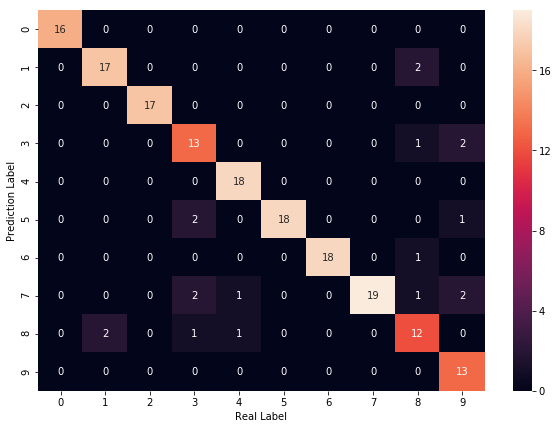

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 19., 17., 16., 18., 21., 19., 25., 16., 13.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:129 index:[5] real:5
#1 min_error:155 index:[2] real:2
#2 min_error:160 index:[8] real:8
#3 min_error:45 index:[0] real:0
#4 min_error:126 index:[1] real:1
#5 min_error:106 index:[7] real:7
#6 min_error:83 index:[6] real:6
#7 min_error:100 index:[3] real:3
#8 min_error:79 index:[2] real:2
#9 min_error:125 index:[1] real:1
#10 min_error:152 index:[7] real:7
#11 min_error:173 index:[7 8] real:4
#12 min_error:95 index:[6] real:6
#13 min_error:108 index:[3] real:3
#14 min_error:126 index:[1] real:1
#15 min_error:128 index:[3] real:3
#16 min_error:152 index:[7] real:9
#17 min_error:112 index:[1] real:1
#18 min_error:145 index:[7] real:7
#19 min_error:59 index:[6] real:6
#20 min_error:148 index:[8] real:8
#21 min_error:92 index:[4] real:4
#22 min_error:98 index:[3] real:3
#23 min_error:132 index:[1] real:1
#24 min_error:87 index:[4] real:4
#25 min_error:61 index:[0] real:0
#26 min_error:102 index:[5] real:5
#27 min_error:93 index:[3] real:3
#28 min_error:112 index:[6] real:6
#29

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:8708 Total connections::8702


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9146567717996289
Avg Base Learner:0.7842589802332603
